In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # 경고 무시

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

sns.set_palette('pastel')

In [2]:
filepath = '/Users/jeongseung-a/Desktop/데분프 플젝/산업체'
filelist = os.listdir(filepath)
filelist

['제주.xlsx', '.DS_Store', '충남.xlsx', '서울.xlsx']

# 충청남도 산업체

In [3]:
fn_1 = '충남.xlsx'
df_1 = pd.read_excel(filepath + '/' + fn_1)
df_1

,행정구역별,산업별,사업체구분별,2020,2020.1
0,행정구역별,산업별,사업체구분별,사업체수 (개),종사자수 (명)
1,충남,전체 산업,계,184103,937082
2,NaN,NaN,단독사업체,171858,626325
3,NaN,NaN,"본사,본점 등",2623,97979
4,NaN,NaN,"공장,지사(점),영업소",9622,212778
...,...,...,...,...,...
76,NaN,NaN,"공장,지사(점),영업소",67,731
77,NaN,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",계,19620,34734
78,NaN,NaN,단독사업체,18998,32012
79,NaN,NaN,"본사,본점 등",54,408


In [4]:
cn= df_1.dropna(subset=['산업별'])
cn

,행정구역별,산업별,사업체구분별,2020,2020.1
0,행정구역별,산업별,사업체구분별,사업체수 (개),종사자수 (명)
1,충남,전체 산업,계,184103,937082
5,NaN,"농업, 임업 및 어업(01~03)",계,671,5205
9,NaN,광업(05~08),계,84,780
13,NaN,제조업(10~34),계,19478,301104
17,NaN,"전기, 가스, 증기 및 공기조절 공급업(35)",계,310,6996
21,NaN,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",계,631,6828
25,NaN,건설업(41~42),계,7791,50846
29,NaN,도매 및 소매업(45~47),계,44714,100615
33,NaN,운수 및 창고업(49~52),계,16127,37870


In [5]:
cn.drop(['행정구역별','사업체구분별'],axis=1)
cn.rename(columns={'2020':'사업체수(개)'},inplace=True)
cn.rename(columns={'2020.1':'종사자수(명)'},inplace=True)

In [6]:
cn=cn.drop([0,1])

In [7]:
cn=cn.fillna('충남')

In [8]:
cn

,행정구역별,산업별,사업체구분별,사업체수(개),종사자수(명)
5,충남,"농업, 임업 및 어업(01~03)",계,671,5205
9,충남,광업(05~08),계,84,780
13,충남,제조업(10~34),계,19478,301104
17,충남,"전기, 가스, 증기 및 공기조절 공급업(35)",계,310,6996
21,충남,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",계,631,6828
25,충남,건설업(41~42),계,7791,50846
29,충남,도매 및 소매업(45~47),계,44714,100615
33,충남,운수 및 창고업(49~52),계,16127,37870
37,충남,숙박 및 음식점업(55~56),계,39653,86765
41,충남,정보통신업(58~63),계,964,6237


In [11]:
cn_t=cn.loc[[37,73,77]]

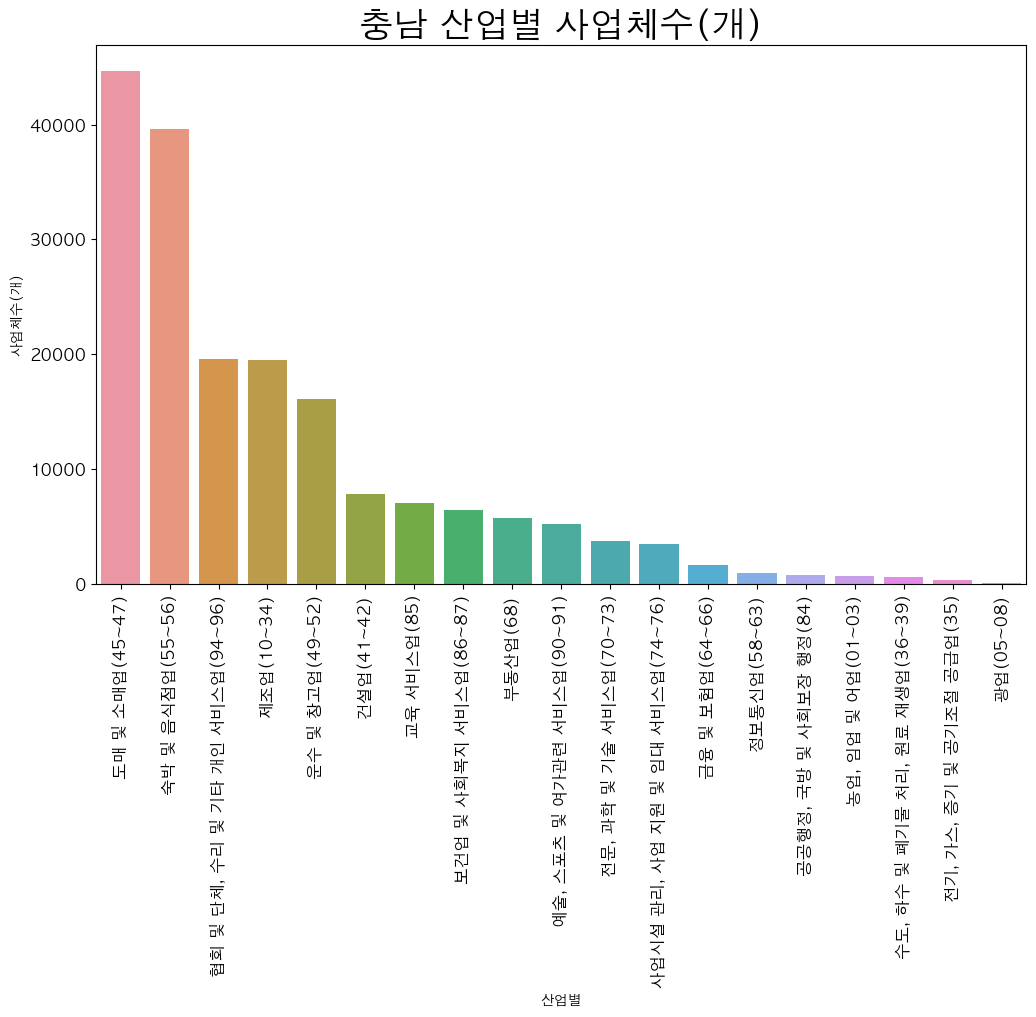

In [12]:
ccn= cn.groupby(['산업별'])[['사업체수(개)']].mean()
ccn.reset_index(drop=False, inplace=True)
ccn.sort_values(by='사업체수(개)', ascending=False, inplace=True)
rcParams['figure.figsize'] = 12,7
sns.barplot(data = ccn,
           x=ccn['산업별'],
           y=ccn['사업체수(개)'])
plt.title('충남 산업별 사업체수(개)', size=25)
plt.xticks(rotation=90,size=12)
plt.yticks(size=12)
y_range = plt.ylim()
plt.show()

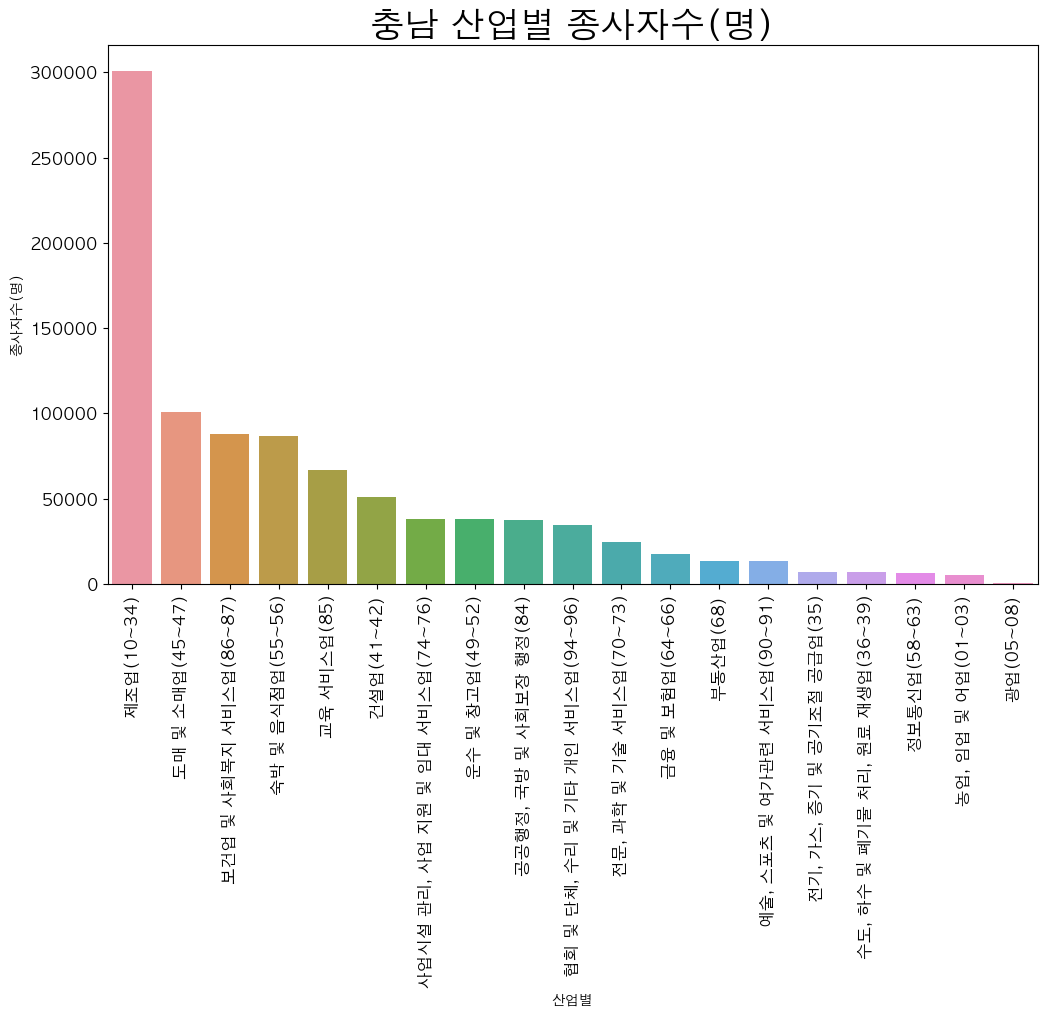

In [13]:
ccn2= cn.groupby(['산업별'])[['종사자수(명)']].mean()
ccn2.reset_index(drop=False, inplace=True)
ccn2.sort_values(by='종사자수(명)', ascending=False, inplace=True)
rcParams['figure.figsize'] = 12,7
sns.barplot(data = ccn2,
           x=ccn2['산업별'],
           y=ccn2['종사자수(명)'])
plt.title('충남 산업별 종사자수(명)', size=25)
plt.xticks(rotation=90,size=12)
plt.yticks(size=12)
plt.show()

# 서울 산업체

In [14]:
fn_2 = '서울.xlsx'
df_2 = pd.read_excel(filepath + '/' + fn_2)
df_2

,행정구역별,산업별,사업체구분별,2020,2020.1
0,행정구역별,산업별,사업체구분별,사업체수 (개),종사자수 (명)
1,서울,전체 산업,계,1211053,5868926
2,NaN,NaN,단독사업체,1127404,3716641
3,NaN,NaN,"본사,본점 등",25638,1316981
4,NaN,NaN,"공장,지사(점),영업소",58011,835304
...,...,...,...,...,...
75,NaN,NaN,"공장,지사(점),영업소",1163,14620
76,NaN,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",계,80470,195171
77,NaN,NaN,단독사업체,77542,158198
78,NaN,NaN,"본사,본점 등",876,17067


In [15]:
se=df_2.dropna(subset=['산업별'])
se.drop(['행정구역별','사업체구분별'],axis=1)
se.rename(columns={'2020':'사업체수(개)'},inplace=True)
se.rename(columns={'2020.1':'종사자수(명)'},inplace=True)

In [16]:
se=se.drop([0,1])

In [17]:
se=se.fillna('서울')
se

,행정구역별,산업별,사업체구분별,사업체수(개),종사자수(명)
5,서울,"농업, 임업 및 어업(01~03)",계,170,835
9,서울,광업(05~08),계,25,94
12,서울,제조업(10~34),계,78642,284356
16,서울,"전기, 가스, 증기 및 공기조절 공급업(35)",계,824,6841
20,서울,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",계,728,10342
24,서울,건설업(41~42),계,67598,515446
28,서울,도매 및 소매업(45~47),계,352424,1043507
32,서울,운수 및 창고업(49~52),계,105405,279478
36,서울,숙박 및 음식점업(55~56),계,145757,432643
40,서울,정보통신업(58~63),계,55937,459805


In [19]:
se_t=se.loc[[36,72,76]]

# 제주 산업체

In [20]:
fn_3 = '제주.xlsx'
df_3 = pd.read_excel(filepath + '/' + fn_3)
df_3

,행정구역별,산업별,사업체구분별,2020,2020.1
0,행정구역별,산업별,사업체구분별,사업체수 (개),종사자수 (명)
1,제주,전체 산업,계,94001,318891
2,NaN,NaN,단독사업체,89264,248473
3,NaN,NaN,"본사,본점 등",860,25667
4,NaN,NaN,"공장,지사(점),영업소",3877,44751
...,...,...,...,...,...
75,NaN,NaN,"공장,지사(점),영업소",65,2225
76,NaN,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",계,6778,13614
77,NaN,NaN,단독사업체,6433,11819
78,NaN,NaN,"본사,본점 등",31,581


In [21]:
je=df_3.dropna(subset=['산업별'])
je.drop(['행정구역별','사업체구분별'],axis=1)
je.rename(columns={'2020':'사업체수(개)'},inplace=True)
je.rename(columns={'2020.1':'종사자수(명)'},inplace=True)

In [22]:
je=je.drop([0,1])

In [23]:
je=je.fillna('제주')

In [24]:
je

,행정구역별,산업별,사업체구분별,사업체수(개),종사자수(명)
5,제주,"농업, 임업 및 어업(01~03)",계,759,3981
9,제주,광업(05~08),계,11,191
12,제주,제조업(10~34),계,3623,13851
16,제주,"전기, 가스, 증기 및 공기조절 공급업(35)",계,1088,2214
20,제주,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",계,188,1459
24,제주,건설업(41~42),계,9293,34111
28,제주,도매 및 소매업(45~47),계,22092,49822
32,제주,운수 및 창고업(49~52),계,7857,17701
36,제주,숙박 및 음식점업(55~56),계,22687,55453
40,제주,정보통신업(58~63),계,859,7000


In [25]:
je_t=je.loc[[36,72,76]]

# 충남 제주 서울 비교

산업체 수 

In [26]:
seoul_01 = se.groupby(['산업별'])[['사업체수(개)']].mean()
seoul_01.reset_index(drop=False, inplace=True)
seoul_01['행정구역'] = '서울'

jeju_01 = je.groupby(['산업별'])[['사업체수(개)']].mean()
jeju_01.reset_index(drop=False, inplace=True)
jeju_01['행정구역'] = '제주'

chungnam_01 =cn.groupby(['산업별'])[['사업체수(개)']].mean()
chungnam_01.reset_index(drop=False, inplace=True)
chungnam_01['행정구역'] = '충남'


In [27]:
df1 = pd.concat([seoul_01,jeju_01,chungnam_01], axis = 0)

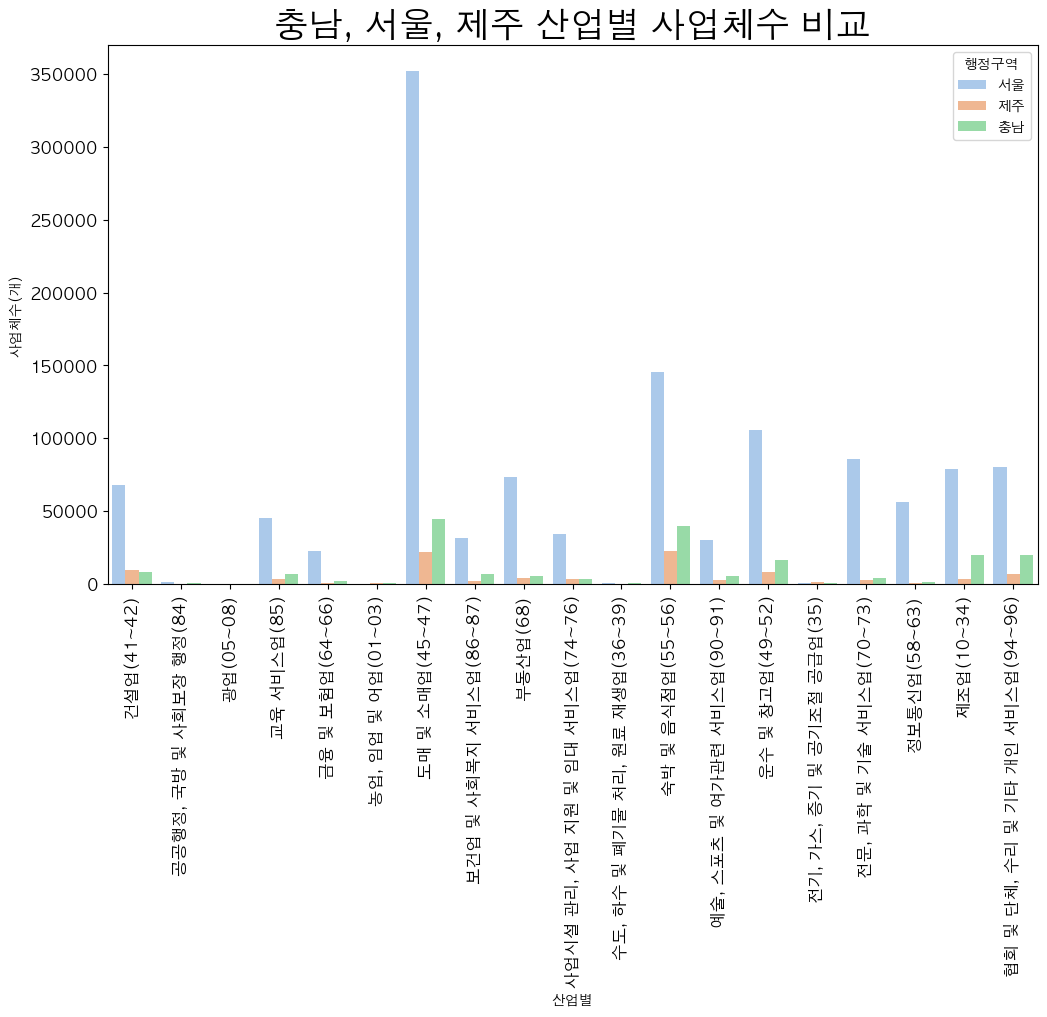

In [28]:
rcParams['figure.figsize'] = 12, 7
sns.barplot(data=df1, x='산업별', y='사업체수(개)', hue='행정구역')
plt.title('충남, 서울, 제주 산업별 사업체수 비교', size=25)
plt.xticks(rotation=90, size=12)
plt.yticks(size=12)
plt.show()

In [29]:
seoul_t = se_t.groupby(['산업별'])[['사업체수(개)']].mean()
seoul_t.reset_index(drop=False, inplace=True)
seoul_t['행정구역'] = '서울'

jeju_t = je_t.groupby(['산업별'])[['사업체수(개)']].mean()
jeju_t.reset_index(drop=False, inplace=True)
jeju_t['행정구역'] = '제주'

chungnam_t =cn_t.groupby(['산업별'])[['사업체수(개)']].mean()
chungnam_t.reset_index(drop=False, inplace=True)
chungnam_t['행정구역'] = '충남'

In [30]:
df_t1 = pd.concat([seoul_t,jeju_t,chungnam_t], axis = 0)

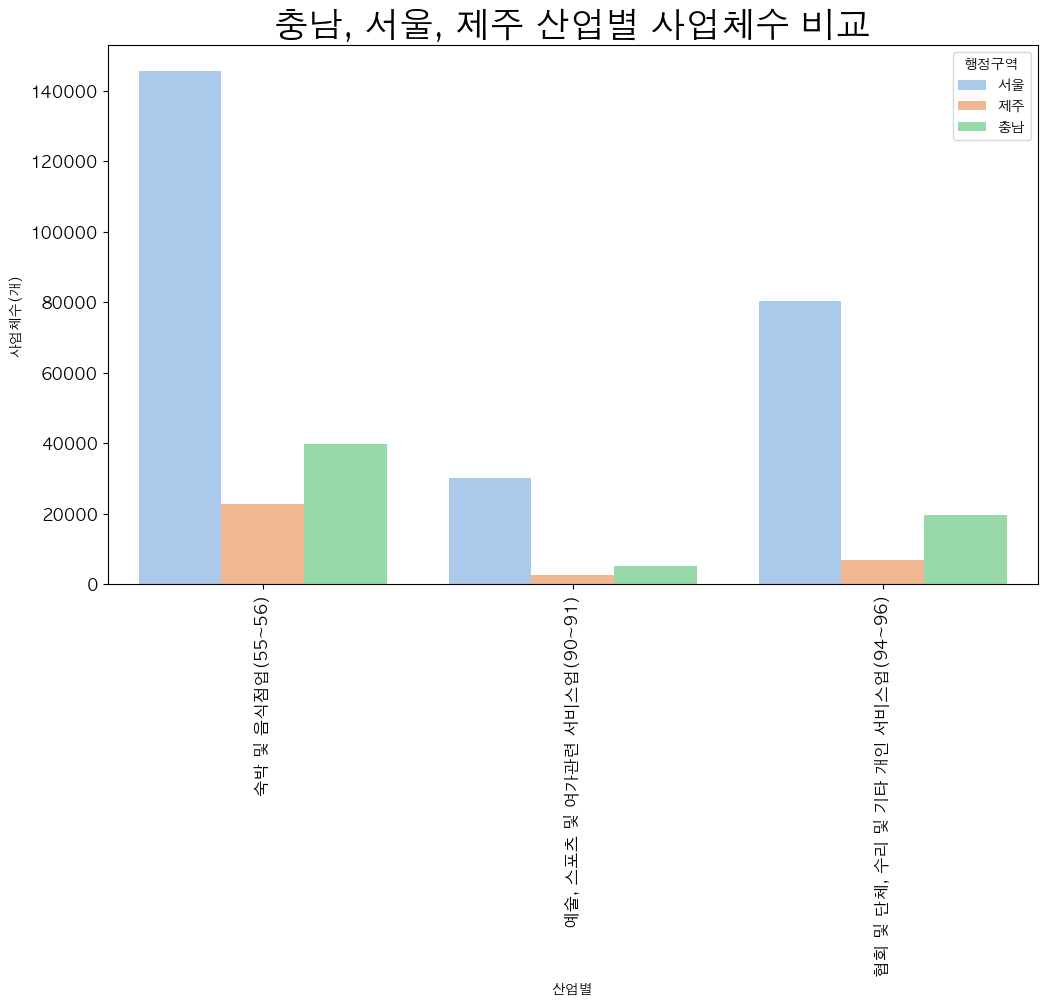

In [31]:
rcParams['figure.figsize'] = 12, 7
sns.barplot(data=df_t1, x='산업별', y='사업체수(개)', hue='행정구역')
plt.title('충남, 서울, 제주 산업별 사업체수 비교', size=25)
plt.xticks(rotation=90, size=12)
plt.yticks(size=12)
plt.show()

종사자수

In [32]:
seoul_02 = se.groupby(['산업별'])[['종사자수(명)']].mean()
seoul_02.reset_index(drop=False, inplace=True)
seoul_02['행정구역'] = '서울'

jeju_02 = je.groupby(['산업별'])[['종사자수(명)']].mean()
jeju_02.reset_index(drop=False, inplace=True)
jeju_02['행정구역'] = '제주'

chungnam_02 =cn.groupby(['산업별'])[['종사자수(명)']].mean()
chungnam_02.reset_index(drop=False, inplace=True)
chungnam_02['행정구역'] = '충남'

In [33]:
df2 = pd.concat([seoul_02,jeju_02,chungnam_02], axis = 0)

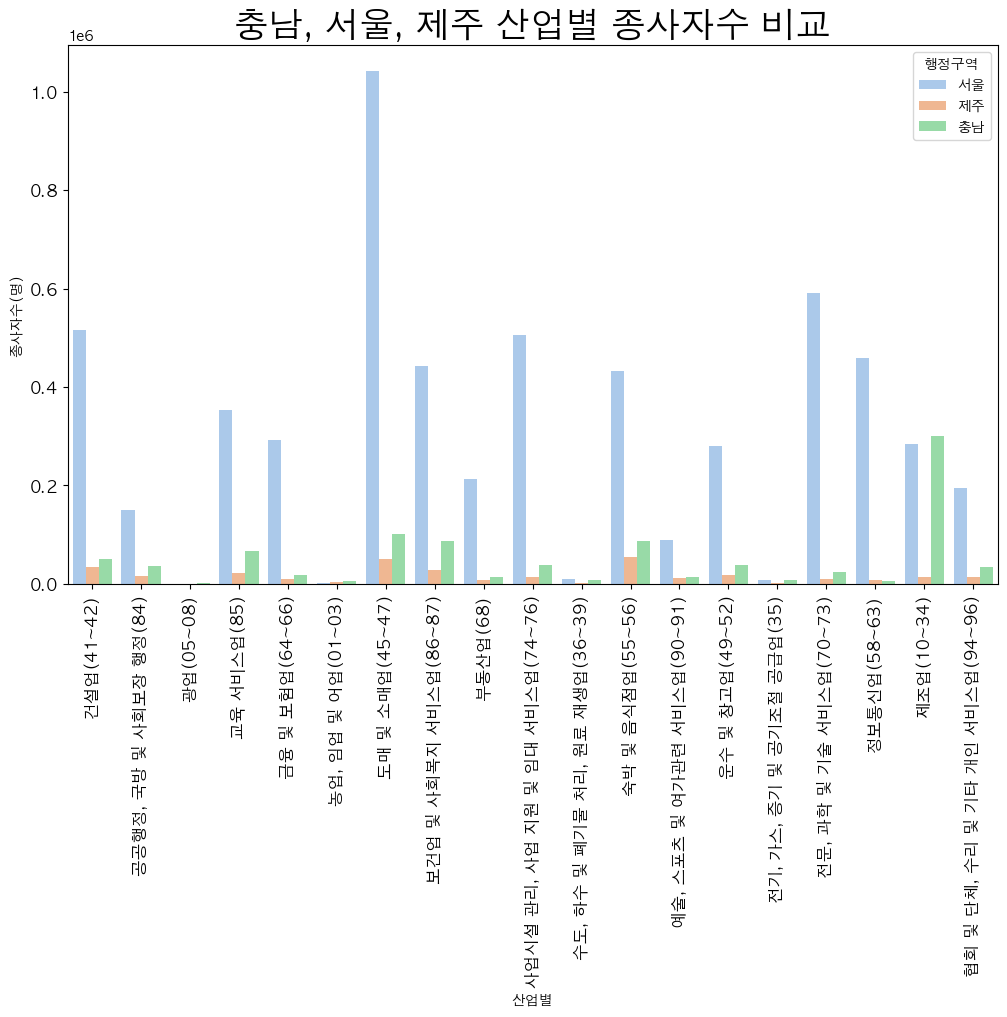

In [35]:
rcParams['figure.figsize'] = 12, 7
sns.barplot(data=df2, x='산업별', y='종사자수(명)', hue='행정구역')
plt.title('충남, 서울, 제주 산업별 종사자수 비교', size=25)
plt.xticks(rotation=90, size=12)
plt.yticks(size=12)
plt.show()

In [36]:
seoul_t2 = se_t.groupby(['산업별'])[['종사자수(명)']].mean()
seoul_t2.reset_index(drop=False, inplace=True)
seoul_t2['행정구역'] = '서울'

jeju_t2 = je_t.groupby(['산업별'])[['종사자수(명)']].mean()
jeju_t2.reset_index(drop=False, inplace=True)
jeju_t2['행정구역'] = '제주'

chungnam_t2 =cn_t.groupby(['산업별'])[['종사자수(명)']].mean()
chungnam_t2.reset_index(drop=False, inplace=True)
chungnam_t2['행정구역'] = '충남'

In [37]:
df_t2 = pd.concat([seoul_t2,jeju_t2,chungnam_t2], axis = 0)

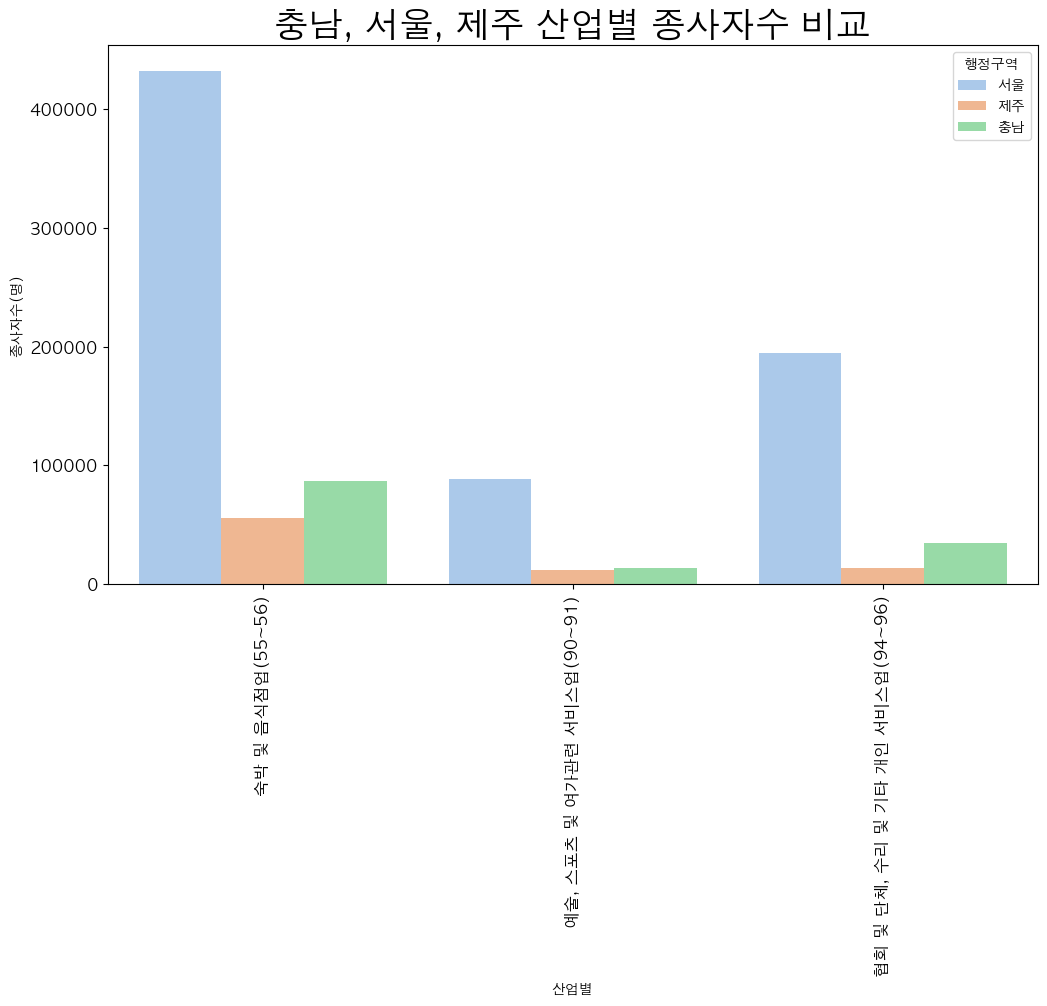

In [38]:
rcParams['figure.figsize'] = 12, 7
sns.barplot(data=df_t2, x='산업별', y='종사자수(명)', hue='행정구역')
plt.title('충남, 서울, 제주 산업별 종사자수 비교', size=25)
plt.xticks(rotation=90, size=12)
plt.yticks(size=12)
plt.show()